In [7]:
# dummy code for understanding for sequence creation for time-series analysis or sequence modeling  
import numpy as np
import pandas as pd

# Example data
data = {
    'CPU_load': [0, 9, 7, 5, 6] * 3454,  # Simplified for illustration
    'CPU_Util': [0, 9, 7, 5, 6] * 3454,
    'Mem_util': [0, 9, 7, 5, 6] * 3454,
    'In_traffic': [0, 9, 7, 5, 6] * 3454,
    'Out_traffic': [0, 9, 7, 5, 6] * 3454,
    'host_ip': [1, 1, 7, 5, 8] * 3454,
    'host_status': [0, 1, 1, 1, 1] * 3454
}
index = pd.date_range('2023-01-01', periods=len(data['CPU_load']), freq='H')
df = pd.DataFrame(data, index=index) 
display(df)



,CPU_load,CPU_Util,Mem_util,In_traffic,Out_traffic,host_ip,host_status
2023-01-01 00:00:00,0,0,0,0,0,1,0
2023-01-01 01:00:00,9,9,9,9,9,1,1
2023-01-01 02:00:00,7,7,7,7,7,7,1
2023-01-01 03:00:00,5,5,5,5,5,5,1
2023-01-01 04:00:00,6,6,6,6,6,8,1
...,...,...,...,...,...,...,...
2024-12-20 09:00:00,0,0,0,0,0,1,0
2024-12-20 10:00:00,9,9,9,9,9,1,1
2024-12-20 11:00:00,7,7,7,7,7,7,1
2024-12-20 12:00:00,5,5,5,5,5,5,1


In [8]:
# Combined features array
combined_features = df[['CPU_load', 'CPU_Util', 'Mem_util', 'In_traffic', 'Out_traffic', 'host_ip']].values

# Target values
target_values = df['host_status'].values

# This process is particularly useful in time series analysis and sequence modeling tasks
def create_sequences(combined_features, target_column, window_size):
    sequences = []
    for i in range(len(combined_features) - window_size):
        sequences.append((combined_features[i:i + window_size], target_column[i + window_size]))
        print(sequences[i])
    return np.array(sequences)

window_size = 2 # window_size: The size of the sliding window to create sequences,a window size of 2 is specified, which likely corresponds to 2 hours of data.

sequences = create_sequences(combined_features, df['host_status'].values, window_size)
sequences

(array([[0, 0, 0, 0, 0, 1],
       [9, 9, 9, 9, 9, 1]]), 1)
(array([[9, 9, 9, 9, 9, 1],
       [7, 7, 7, 7, 7, 7]]), 1)
(array([[7, 7, 7, 7, 7, 7],
       [5, 5, 5, 5, 5, 5]]), 1)
(array([[5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 8]]), 0)
(array([[6, 6, 6, 6, 6, 8],
       [0, 0, 0, 0, 0, 1]]), 1)
(array([[0, 0, 0, 0, 0, 1],
       [9, 9, 9, 9, 9, 1]]), 1)
(array([[9, 9, 9, 9, 9, 1],
       [7, 7, 7, 7, 7, 7]]), 1)
(array([[7, 7, 7, 7, 7, 7],
       [5, 5, 5, 5, 5, 5]]), 1)
(array([[5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 8]]), 0)
(array([[6, 6, 6, 6, 6, 8],
       [0, 0, 0, 0, 0, 1]]), 1)
(array([[0, 0, 0, 0, 0, 1],
       [9, 9, 9, 9, 9, 1]]), 1)
(array([[9, 9, 9, 9, 9, 1],
       [7, 7, 7, 7, 7, 7]]), 1)
(array([[7, 7, 7, 7, 7, 7],
       [5, 5, 5, 5, 5, 5]]), 1)
(array([[5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 8]]), 0)
(array([[6, 6, 6, 6, 6, 8],
       [0, 0, 0, 0, 0, 1]]), 1)
(array([[0, 0, 0, 0, 0, 1],
       [9, 9, 9, 9, 9, 1]]), 1)
(array([[9, 9, 9, 9, 9, 1],
       [7, 7

/tmp/ipykernel_1705462/3205839165.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


array([[array([[0, 0, 0, 0, 0, 1],
               [9, 9, 9, 9, 9, 1]]), 1],
       [array([[9, 9, 9, 9, 9, 1],
               [7, 7, 7, 7, 7, 7]]), 1],
       [array([[7, 7, 7, 7, 7, 7],
               [5, 5, 5, 5, 5, 5]]), 1],
       ...,
       [array([[0, 0, 0, 0, 0, 1],
               [9, 9, 9, 9, 9, 1]]), 1],
       [array([[9, 9, 9, 9, 9, 1],
               [7, 7, 7, 7, 7, 7]]), 1],
       [array([[7, 7, 7, 7, 7, 7],
               [5, 5, 5, 5, 5, 5]]), 1]], dtype=object)

How to decide the window_size 

- The window size should capture the relevant patterns and temporal dependencies in the data.
Seasonality and Cyclic Patterns:

- If the data has clear seasonal patterns (e.g., daily, weekly, monthly), the window size should at least cover one full cycle of the pattern.
For example, if you are analyzing hourly data with daily seasonality, a window size of 24 (hours) might be appropriate.
- **1. Lagged Dependencies :**

    - Understanding how far back in time the current values are influenced by past values can help determine the window size.
    - For example, in stock price prediction, the influence might last for a few days, so a window size covering those days is essential.
- **2. Data-Driven Methods :**
    - **Autocorrelation Analysis :**

        - Plot the autocorrelation function (ACF) of the time series data to identify significant lags.
        - The window size can be chosen based on the lag where the autocorrelation starts to decline significantly.
    - **Partial Autocorrelation Analysis :**

        - The partial autocorrelation function (PACF) can help identify the number of lags that have a significant correlation with the current value after controlling for the values at shorter lags.
- **3. Model Performance :**
    - **Cross-Validation :**

        - Experiment with different window sizes and use cross-validation to assess model performance for each window size.
        - Select the window size that results in the best performance based on metrics like mean squared error, mean absolute error, accuracy, etc.
    - **Grid Search :**

        - Perform a grid search over a range of window sizes to find the optimal one.
        - This approach is computationally expensive but can provide a data-driven solution.


**Practical Example :**


Here's an example of how you might determine the window size using autocorrelation and cross-validation:

**Autocorrelation Analysis**

/home/echelon/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


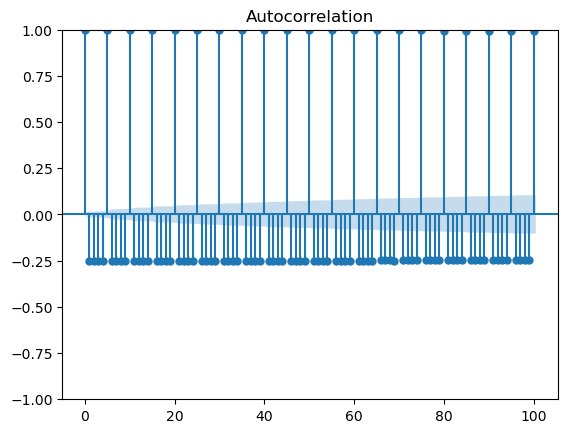

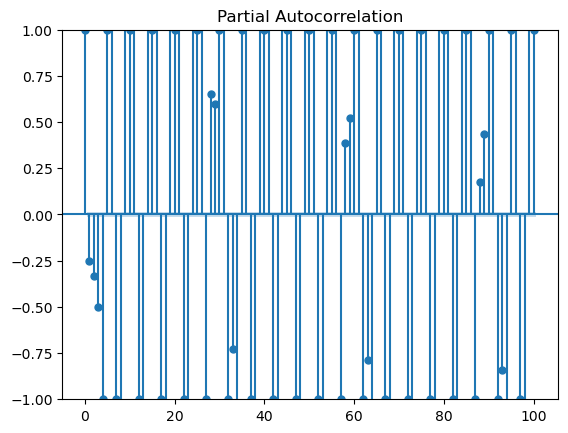

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df is your dataframe with a 'host_status' column
plot_acf(df['host_status'], lags=100)
plot_pacf(df['host_status'], lags=100)
plt.show()
